# Day 8 of Data Science by `Mr. Harshit Dawar`!

## Ensemble Learning
* Bagging techniques:
  * Runs multiple weak learners/ algorithms in parallel mode.
  * Example: Random Forest 
  
* Boosting techniques:
  * It contains 3 algorithms.
    * Adaptive Boosting
    * Gradient Boosting.
    * XGBoost (Xtreme Gradeint Boosting).

## XGBoost

In [7]:
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [8]:
# Importing Dataset
x = pd.read_csv("dataset/xdata.csv").values
y = pd.read_csv("dataset/ydata.csv").values

In [13]:
x = x[:, 1:]

In [15]:
y = y[:, 1:]

In [17]:
x[:5]

array([[3.516279  , 3.71975047],
       [4.60649561, 3.41437943],
       [4.67701056, 3.04724443],
       [4.15772454, 3.13867678],
       [3.15443087, 3.61985805]])

In [18]:
y[:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [19]:
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [24]:
# Applying XGBOOST to the data

from xgboost import XGBClassifier
classifier = XGBClassifier()

#Fitting the model.
classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [25]:
# Checking hyper-parameters of the model
classifier.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [26]:
# Evaluating the Model
y_pred = classifier.predict(x_test)

In [27]:
y_pred

array([0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 1.])

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
accuracy_score(y_pred, y_test) * 100

100.0

In [31]:
import seaborn as sns

In [32]:
cm = confusion_matrix(y_pred, y_test)

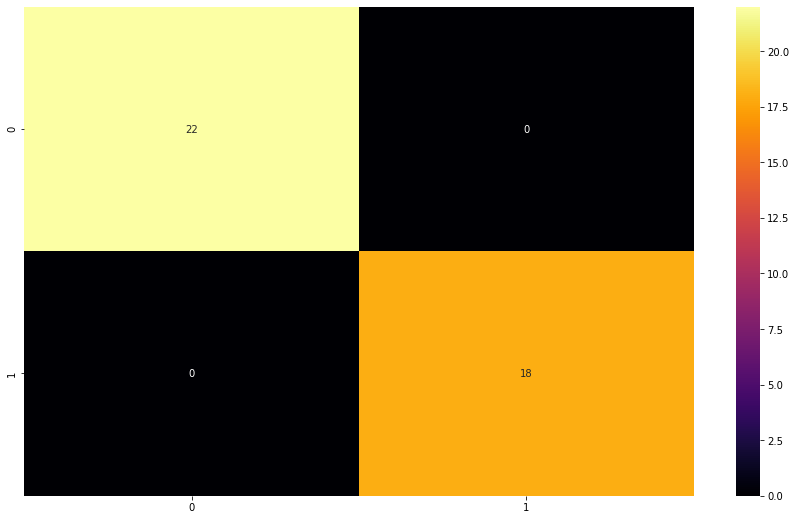

In [34]:
plt.figure(figsize = (15,9))
sns.heatmap(cm, annot = True, cmap = "inferno")
plt.show()

In [37]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [39]:
len(y_test)

40

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [43]:
arr = np.full(shape = (3,3), fill_value = 7)

In [44]:
arr

array([[7, 7, 7],
       [7, 7, 7],
       [7, 7, 7]])

In [45]:
# Comparing r^2 metric, array conversion
# arr = np.full(shape = len(y_test), fill_value = y_test.mean())
# r2_score(y_test, y_test)

In [54]:
print(np.array(y_pred))
print(np.array(y_test), end = " ")

[0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1.]
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]] 

In [55]:
mean_absolute_error(y_test, y_pred)

0.0

In [56]:
mean_squared_error(y_test, y_pred)

0.0

## Clustering Algorithm (k-means)

### Choosing Clusters

In [58]:
from sklearn.cluster import KMeans

In [59]:
### WCSS is used to judge how many clusters we should take in K-Means

In [60]:
wcss = []

for i in range(1,16):
    km = KMeans(n_clusters = i, random_state = 5)
    km.fit(x_train)
    wcss.append(km.inertia_)

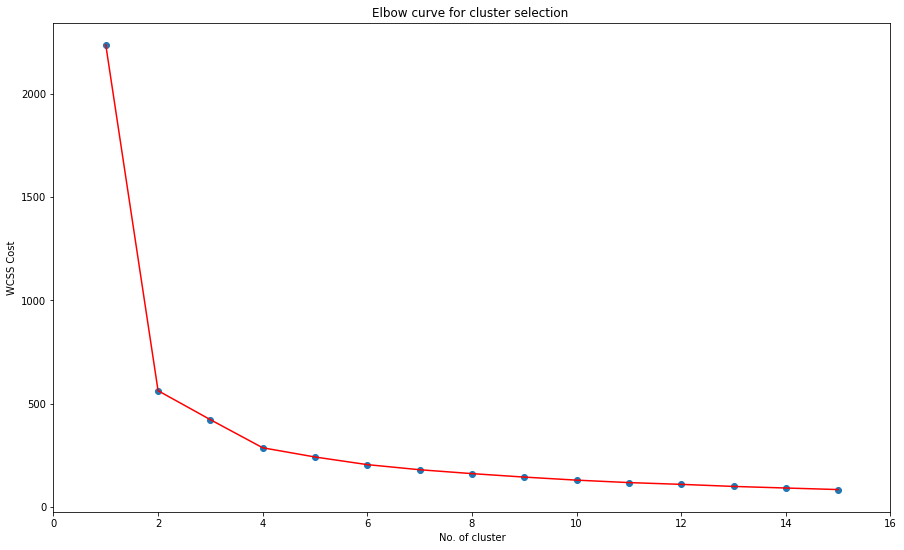

In [68]:
l = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure(figsize = (15,9))
plt.scatter(l, wcss)
plt.plot(l, wcss, c = "red")
plt.xlim(0,16)
plt.xlabel("No. of cluster")
plt.title("Elbow curve for cluster selection ")
plt.ylabel("WCSS Cost")
plt.show()

In [69]:
km1 = KMeans(n_clusters=4)

In [71]:
km1.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [72]:
y_pred = km1.predict(x_test)

In [73]:
y_pred

array([1, 2, 0, 2, 0, 3, 1, 1, 3, 2, 2, 1, 1, 2, 3, 2, 1, 3, 1, 3, 1, 0,
       1, 2, 0, 3, 2, 1, 0, 1, 3, 3, 2, 1, 0, 3, 2, 2, 1, 0], dtype=int32)

In [74]:
# Checking the center values of the cluster
km1.cluster_centers_

array([[-0.79378643,  0.46467975],
       [ 2.15820055,  4.78673188],
       [ 0.66125382,  1.52691806],
       [ 3.53109024,  3.58653565]])

In [77]:
# Checking the unique values in the KMeans
np.unique(km1.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 89,  72,  94, 104]))

# KMeans Proejct [Domain Colour Extraction]

In [78]:
import cv2

In [79]:
image = cv2.imread("test.jpeg")

In [82]:
print(image.shape)

(176, 286, 3)


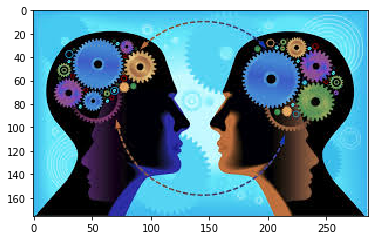

In [84]:
plt.imshow(image)
plt.show()

In [86]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

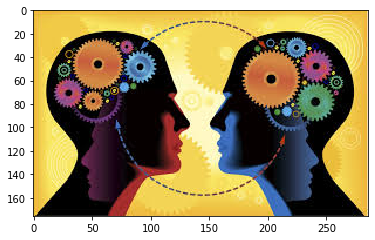

In [87]:
plt.imshow(image)
plt.show()

In [88]:
image.shape

(176, 286, 3)

In [89]:
only_pixels = image.reshape(image.shape[0] * image.shape[1], 3)

In [91]:
only_pixels.shape

(50336, 3)

In [92]:
176 * 286

50336

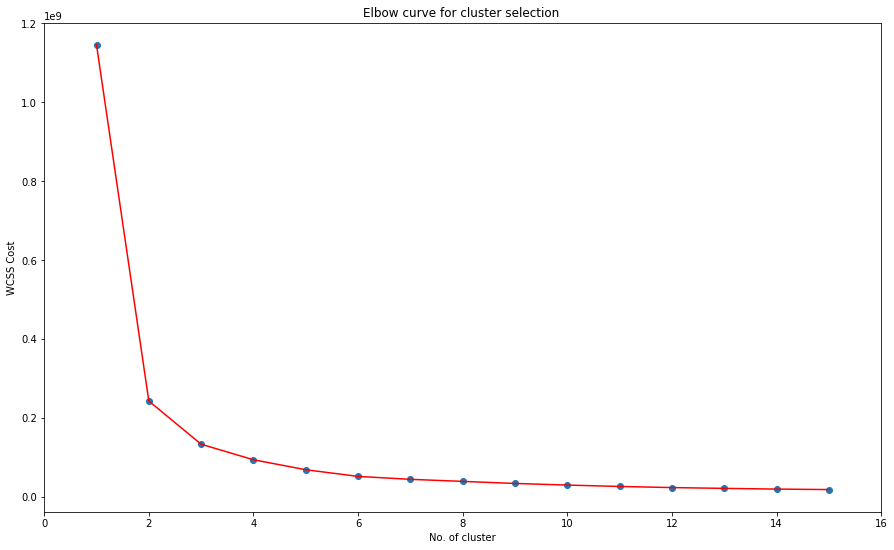

In [93]:
wcss = []

for i in range(1,16):
    km = KMeans(n_clusters = i, random_state = 5)
    km.fit(only_pixels)
    wcss.append(km.inertia_)
    
l = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.figure(figsize = (15,9))
plt.scatter(l, wcss)
plt.plot(l, wcss, c = "red")
plt.xlim(0,16)
plt.xlabel("No. of cluster")
plt.title("Elbow curve for cluster selection ")
plt.ylabel("WCSS Cost")
plt.show()

In [94]:
project_km = KMeans(n_clusters = 3)
project_km.fit(only_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [137]:
centers = project_km.cluster_centers_

In [138]:
centers[project_km.labels_[0]]

array([239.83863817, 206.12154419,  93.84139864])

In [139]:
np.unique(project_km.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([23914, 17739,  8683]))

In [140]:
new_image = np.full(shape = (image.shape[0] * image.shape[1], 3), fill_value = 5)

In [141]:
new_image.shape

(50336, 3)

In [143]:
# plt.imshow(new_image.reshape(image.shape[0], new_image[1], 3))

In [144]:
for i in range(new_image.shape[0]):
    new_image[i] = centers[project_km.labels_[i]]

In [145]:
new_image = new_image.reshape(image.shape[0], image.shape[1], 3)

In [146]:
new_image.shape

(176, 286, 3)

In [147]:
image.shape

(176, 286, 3)

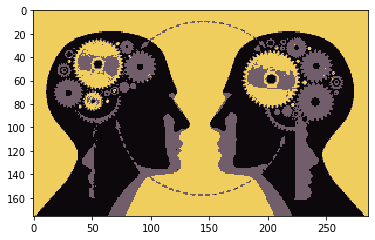

In [149]:
plt.imshow(new_image)
plt.show()

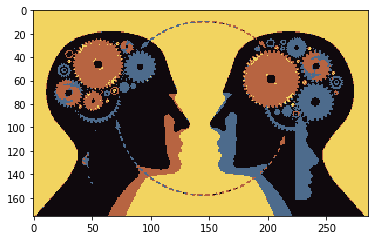

In [150]:
project_km = KMeans(n_clusters = 4)

project_km.fit(only_pixels)

centers = project_km.cluster_centers_

new_image = np.full(shape = (image.shape[0] * image.shape[1], 3), fill_value = 5)

for i in range(new_image.shape[0]):
    new_image[i] = centers[project_km.labels_[i]]

new_image = new_image.reshape(image.shape[0], image.shape[1], 3)
plt.imshow(new_image)
plt.show()

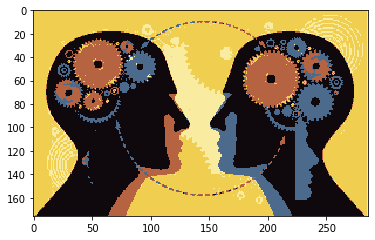

In [151]:
project_km = KMeans(n_clusters = 5)

project_km.fit(only_pixels)

centers = project_km.cluster_centers_

new_image = np.full(shape = (image.shape[0] * image.shape[1], 3), fill_value = 5)

for i in range(new_image.shape[0]):
    new_image[i] = centers[project_km.labels_[i]]

new_image = new_image.reshape(image.shape[0], image.shape[1], 3)
plt.imshow(new_image)
plt.show()

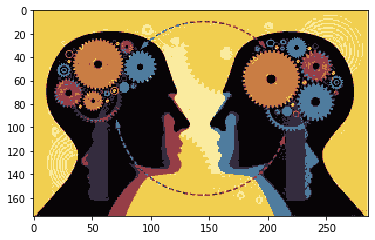

In [152]:
project_km = KMeans(n_clusters = 7)

project_km.fit(only_pixels)

centers = project_km.cluster_centers_

new_image = np.full(shape = (image.shape[0] * image.shape[1], 3), fill_value = 5)

for i in range(new_image.shape[0]):
    new_image[i] = centers[project_km.labels_[i]]

new_image = new_image.reshape(image.shape[0], image.shape[1], 3)
plt.imshow(new_image)
plt.show()

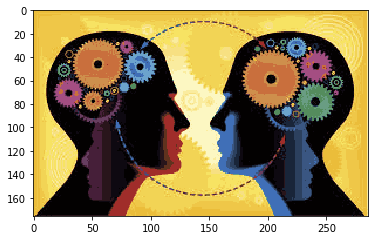

In [154]:
project_km = KMeans(n_clusters = 25)

project_km.fit(only_pixels)

centers = project_km.cluster_centers_

new_image = np.full(shape = (image.shape[0] * image.shape[1], 3), fill_value = 5)

for i in range(new_image.shape[0]):
    new_image[i] = centers[project_km.labels_[i]]

new_image = new_image.reshape(image.shape[0], image.shape[1], 3)
plt.imshow(new_image)
plt.show()

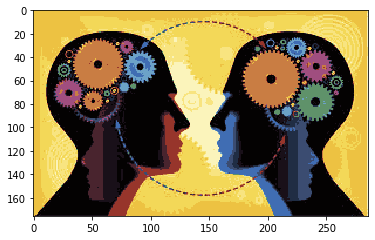

In [156]:
project_km = KMeans(n_clusters = 15)

project_km.fit(only_pixels)

centers = project_km.cluster_centers_

new_image = np.full(shape = (image.shape[0] * image.shape[1], 3), fill_value = 5)

for i in range(new_image.shape[0]):
    new_image[i] = centers[project_km.labels_[i]]

new_image = new_image.reshape(image.shape[0], image.shape[1], 3)
plt.imshow(new_image)
plt.show()

# Well done an awesome project is completed!